Exercise 3: Answers to Bayesian computation with Stan and Farmer Jöns
============ 
### *Rasmus Bååth (adapted for Python by Christophe Carvenius)*

One thing to note is that the code changes you have to make between questions often are *minimal*. Yet we go from running a simple binomial model to running a pretty advanced linear model.

All answers below use wide “sloppy” uniform priors, and these could certainly be shaped up, and be made more informative.

## Question 1

Not much to do here, other than to run it. Here is the graph you would see if everything is working properly.

Inference for Stan model: anon_model_52e804325538434ed998ef88b873f423.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1   0.25  3.5e-3   0.12   0.06   0.16   0.23   0.32   0.51   1126    1.0
theta2   0.58  4.2e-3   0.14    0.3   0.48   0.58   0.68   0.84   1109    1.0
lp__   -15.97    0.04   1.08 -18.87 -16.37 -15.63 -15.21 -14.93    754    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:26:07 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


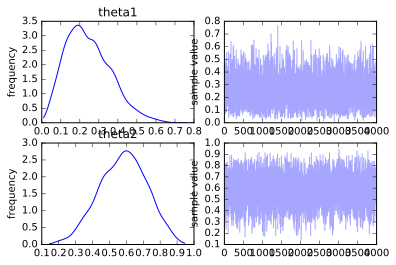

In [1]:
# Import libraries
import pystan # install with pip install pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# The Stan model as a string.
model_string = """
data {
  # Number of data points
  int n1;
  int n2;
  # Number of successes
  int y1[n1];
  int y2[n2];
}

parameters {
  real<lower=0, upper=1> theta1;
  real<lower=0, upper=1> theta2;
}

model {  
  theta1 ~ beta(1, 1);
  theta2 ~ beta(1, 1);
  y1 ~ bernoulli(theta1);
  y2 ~ bernoulli(theta2); 
}

generated quantities {
}
"""

y1 = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
y2 = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
data_list = {'y1' : y1, 'y2' : y2, 'n1' : len(y1), 'n2' : len(y2)}

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())


## Question 2

In [2]:
s = pd.DataFrame(stan_samples.extract())
np.mean(abs(s.theta2 - s.theta1) < 0.2)

0.22450000000000001

## Question 3

Inference for Stan model: anon_model_52e804325538434ed998ef88b873f423.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1   0.25  3.8e-3   0.12   0.06   0.16   0.24   0.33   0.52   1043    1.0
theta2   0.58  4.5e-3   0.14    0.3   0.49   0.59   0.68   0.83    942    1.0
lp__   -15.98    0.04   1.04 -18.76 -16.43 -15.68 -15.22 -14.92    677    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:26:44 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


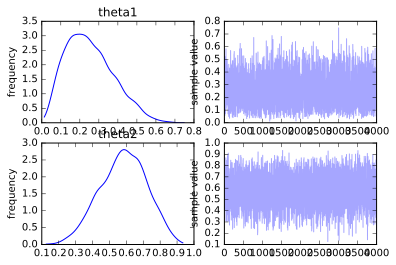

In [3]:
cowA = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
cowB = [0, 0, 1, 1, 1, 0, 1, 1, 1, 0]

# Using the same model as in Question 1, just using the new data. 

data_list = dict(y1 = cowA, y2 = cowB, n1 = len(cowA), n2 = len(cowB))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

Calculate the probability that medicine A is better than medicine B.

In [4]:
s = pd.DataFrame(stan_samples.extract())
np.mean(s.theta1 > s.theta2)

0.049000000000000002

So should probably go with medicine B then…

## Question 4

In [5]:
# The Stan model as a string.
model_string = """
data {
  int n1;
  int n2;
  vector[n1] y1;
  vector[n2] y2;
}

parameters {
  real mu1;
  real mu2;
  real<lower=0> sigma1;
  real<lower=0> sigma2;
}

model {  
  mu1 ~ uniform(0, 2000);
  mu2 ~ uniform(0, 2000);
  sigma1 ~ uniform(0, 1000);
  sigma2 ~ uniform(0, 1000);
  y1 ~ normal(mu1, sigma1);
  y2 ~ normal(mu2, sigma2); 
}

generated quantities {
}
"""

diet_milk = [651, 679, 374, 601, 401, 609, 767, 709, 704, 679]
normal_milk = [798, 1139, 529, 609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538]
data_list = dict(y1 = diet_milk, y2 = normal_milk, 
                  n1 = len(diet_milk), n2 = len(normal_milk))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

Inference for Stan model: anon_model_d91770d58cef9a916c0a8b71913e8619.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu1    619.49     1.7  50.92 517.16 589.11 619.27 649.97  726.3    896    1.0
mu2    594.43    2.03  64.25 463.21 554.08 594.82 637.52 718.87   1006    1.0
sigma1 152.73    1.61  44.35   92.9 122.11 143.64 173.31 262.07    763    1.0
sigma2 249.85    1.76  54.31 170.75 212.01 240.63 278.75 381.26    950    1.0
lp__   -133.4    0.05   1.53 -137.3 -134.2 -133.0 -132.3 -131.5    775    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:27:25 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


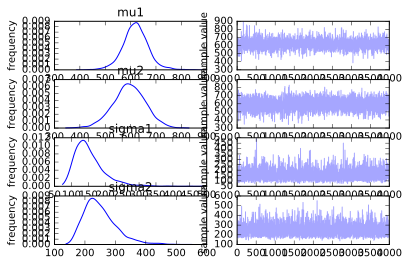

In [6]:
# Summary and plot
print(stan_samples)
print(stan_samples.plot())

Is it likely that the diet is going to make the cows produce more milk on average?

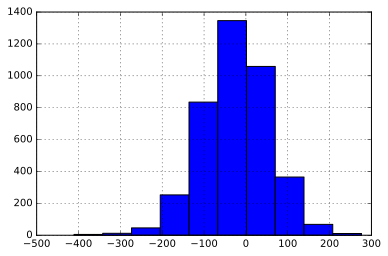

In [7]:
s = pd.DataFrame(stan_samples.extract())
mu_diff = s.mu2 - s.mu1 
mu_diff.hist()

In [8]:
print(np.mean(mu_diff > 0), np.mean(mu_diff < 0))

0.383 0.617


It is almost as likely that the diet is better as that the diet is worse. So this experiment does not really support that the diet will result in the cows producing more milk.

## Question 5

In [9]:
# The Stan model as a string.
model_string = """
data {
  int n1;
  int n2;
  vector[n1] y1;
  vector[n2] y2;
}

parameters {
  real mu1;
  real mu2;
  real<lower=0> sigma1;
  real<lower=0> sigma2;
}

model {  
  mu1 ~ uniform(0, 2000);
  mu2 ~ uniform(0, 2000);
  sigma1 ~ uniform(0, 1000);
  sigma2 ~ uniform(0, 1000);
  y1 ~ student_t(3, mu1, sigma1);
  y2 ~ student_t(3, mu2, sigma2);
}

generated quantities {
}
"""

diet_milk = [651, 679, 374, 601, 4000, 401, 609, 767, 3890, 704, 679]
normal_milk = [798, 1139, 529, 609, 553, 743, 3,151, 544, 488, 15, 257, 692, 678, 675, 538]
data_list = dict(y1 = diet_milk, y2 = normal_milk, 
                  n1 = len(diet_milk), n2 = len(normal_milk))
# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

Inference for Stan model: anon_model_ed9af71bef53103c0ec6c75f813f093c.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu1    659.74    6.05 158.16 376.86 570.29 645.69 728.97 1058.0    684    1.0
mu2    554.08    2.44  78.06 387.34 509.55  556.2 602.17 697.63   1024    1.0
sigma1 427.61    8.48 211.55 144.16 260.65 377.33 561.24  910.9    622    1.0
sigma2 246.73    2.42  70.02 143.96  198.1 235.84 283.84 414.65    835    1.0
lp__   -167.2    0.06   1.48 -170.8 -167.9 -166.9 -166.1 -165.3    711    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:28:08 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


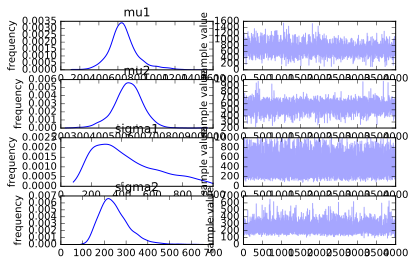

In [10]:
# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

Is it likely that diet is going to make the cows produce more milk on average?

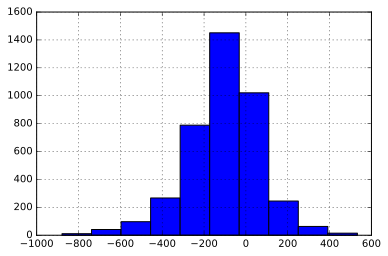

In [11]:
s = pd.DataFrame(stan_samples.extract())
mu_diff = s.mu2 - s.mu1
mu_diff.hist()

In [12]:
print(np.mean(mu_diff > 0), np.mean(mu_diff < 0))

0.2585 0.7415


Again there is no strong evidence that the diet is any good (but compare with the result, would you have used the original Normal model!).

## Question 6

Inference for Stan model: anon_model_6f9d9e6fda578d8bd7886a7be64f5670.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda1   3.28    0.02   0.56   2.26   2.89   3.26   3.62   4.47   1074    1.0
lambda2   1.91    0.01   0.41   1.19   1.62   1.89   2.18   2.78   1084    1.0
lp__     -1.75    0.04   1.03  -4.49  -2.16  -1.42  -1.03  -0.77    745    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:28:52 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


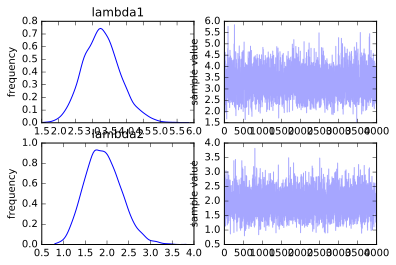

In [13]:
# The Stan model as a string.
model_string = """
data {
  int n1;
  int n2;
  int y1[n1];
  int y2[n2];
}

parameters {
  real<lower=0> lambda1;
  real<lower=0> lambda2;
}

model {  
  lambda1 ~ uniform(0, 100);
  lambda2 ~ uniform(0, 100);
  y1 ~ poisson(lambda1);
  y2 ~ poisson(lambda2); 
}

generated quantities {
}
"""

diet_eggs = [6, 4, 2, 3, 4, 3, 0, 4, 0, 6, 3]
normal_eggs = [4, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1]
data_list = dict(y1 = diet_eggs, y2 = normal_eggs, 
                  n1 = len(diet_eggs), n2 = len(normal_eggs))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

Is it likely that diet going to make the chickens produce more eggs on average?

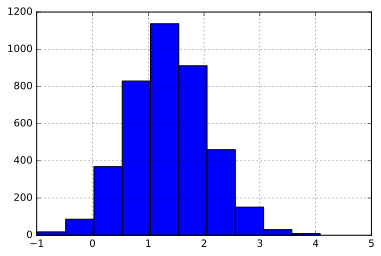

In [14]:
s = pd.DataFrame(stan_samples.extract())
lambda_diff = s.lambda1 - s.lambda2 
lambda_diff.hist()

In [15]:
np.mean(lambda_diff > 0)

0.97599999999999998

There is pretty good evidence that the diet is effective and that chickens on the diet produce more eggs on average (that is, `lambda1` seems higher than `lambda2`). Looking at `lambda_diff` a "best guess" is that the diet results in around 1-2 more eggs on average.

## Question 7
This implements the same model as in question 4, but using smarter indexing so that the code is not as redundant and so that it works with the format of the data in the data.frame `d`.

Inference for Stan model: anon_model_d9b52e776fbe5900f9d9ab13f582d8d7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    617.79    1.54  49.37 523.12 587.18 617.39 648.99  717.9   1022    1.0
mu[1]    594.45    2.09  65.32 462.55 553.08 595.11 635.05 726.11    976    1.0
sigma[0] 152.99    1.64  46.07  93.36 121.84 142.81 174.17 266.02    785    1.0
sigma[1] 248.37     1.7  53.23 170.65 211.79 239.79 276.57 374.24    981    1.0
lp__     -133.4    0.06   1.53 -137.2 -134.2 -133.0 -132.3 -131.5    764    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:29:31 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


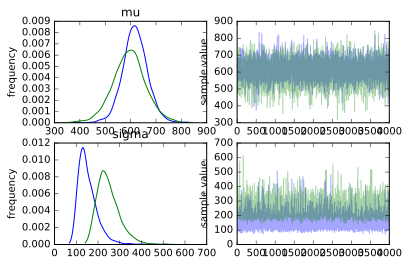

In [16]:
# The Stan model as a string.
model_string = """
data {
  int n;
  int n_groups;
  int x[n];
  vector[n] y;
}

parameters {
  vector[n_groups] mu;
  vector<lower=0>[n_groups] sigma;
}

model {  
  mu ~ uniform(0, 2000);
  sigma ~ uniform(0, 1000);
  y ~ normal(mu[x], sigma[x]);
}

generated quantities {
}
"""

d = pd.DataFrame({'milk' : [651, 679, 374, 601, 401, 609, 767, 709, 704, 679, 798, 1139,
                            529, 609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538],
                  'group' : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 
                             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]})
data_list = dict(y = d.milk, x = d.group, n = len(d.milk), 
                  n_groups = max(d.group))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

This should give you the same result as in question 4.

## Question 8
Amazingly we don’t have to change the model at all from question 7, we can just rerun it with the new data. That is, if we were smart with how we defined the priors and instead of writing:

```mu[1] ~ uniform(0, 2000);
mu[2] ~ uniform(0, 2000);```

simply wrote 

`mu ~ uniform(0, 2000);`.

Inference for Stan model: anon_model_d9b52e776fbe5900f9d9ab13f582d8d7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    617.24    1.64  51.28 515.51 585.07 617.77 649.31 716.34    980    1.0
mu[1]    597.82    2.07  64.84 469.93 555.35 596.32 638.37 730.12    982    1.0
mu[2]    731.03    2.06  61.24 604.37 693.68  732.4 768.44 850.18    887    1.0
sigma[0] 153.24    1.51  44.39  91.59 122.74 143.64 174.36 263.65    864    1.0
sigma[1] 249.08     1.7  53.99 170.15 211.66  240.0 276.69 381.43   1011    1.0
sigma[2] 187.67    1.83  54.21 114.87  149.8 176.54 213.01 326.41    876    1.0
lp__     -184.7    0.07   1.89 -189.4 -185.8 -184.4 -183.3 -182.1    778    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:30:10 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale 

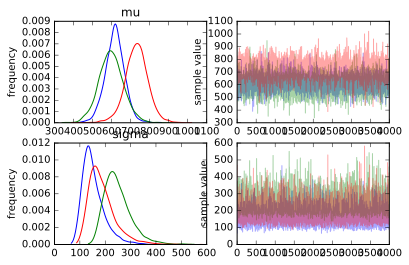

In [17]:
model_string = """
data {
  int n;
  int n_groups;
  int x[n];
  vector[n] y;
}

parameters {
  vector[n_groups] mu;
  vector<lower=0>[n_groups] sigma;
}

model {  
  mu ~ uniform(0, 2000);
  sigma ~ uniform(0, 1000);
  y ~ normal(mu[x], sigma[x]);
}

generated quantities {
}
"""
d = pd.DataFrame({'milk' : [651, 679, 374, 601, 401, 609, 767, 709, 704, 679, 798, 1139, 529,
                             609, 553, 743, 151, 544, 488, 555, 257, 692, 678, 675, 538, 1061,
                             721, 595, 784, 877, 562, 800, 684, 741, 516],
                  'group' : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                             2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]})

data_list = dict(y = d.milk, x = d.group, n = len(d.milk), 
                  n_groups = max(d.group))


# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)

# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

In [20]:
# Extract mu values, list comprehension to name data frame columns 
stan_samples_mu = stan_samples.extract()['mu']
s = pd.DataFrame(stan_samples_mu, columns = ['mu_%d' % i for i in range(max(d.group))])

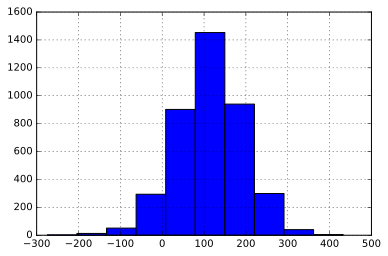

In [21]:
(s.mu_2 - s.mu_0).hist()

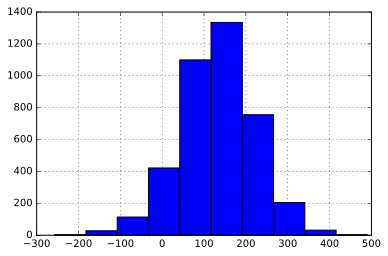

In [22]:
(s.mu_2 - s.mu_1).hist()

In [23]:
np.mean(s.mu_2 - s.mu_0 > 0)

0.92649999999999999

In [24]:
np.mean(s.mu_2 - s.mu_1 > 0)

0.93774999999999997

So it is pretty likely that diet 2 (`mu_2`) is better than both diet 1 (`mu_1`) and using no special diet (`mu_0`).

## Question 9
So, let’s change the model from question 7 into a regression model!

Inference for Stan model: anon_model_2a8ccdf4137ea717b5e8c9c3300bfae4.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta0  406.4     5.3  137.8 116.71 317.42 409.05 497.91 667.45    676    1.0
beta1  61.16    0.71  18.34  26.38  49.28  60.56  72.88  99.66    675    1.0
sigma 223.52     1.6   42.3 159.57  193.5 217.79 247.77 322.51    696    1.0
lp__  -111.9    0.05   1.29 -115.2 -112.5 -111.6 -111.0 -110.4    568    1.0

Samples were drawn using NUTS(diag_e) at Tue Jan 19 17:31:38 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Figure(480x320)


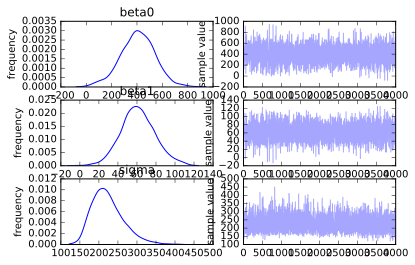

In [25]:
# The Stan model as a string.
model_string = """
data {
  int n;
  vector[n] x;
  vector[n] y;
}

parameters {
  real beta0;
  real beta1;
  real<lower=0> sigma;
}

model {  
  vector[n] mu;
  beta0 ~ uniform(-1000, 1000);
  beta1 ~ uniform(-1000, 1000);
  sigma ~ uniform(0, 1000);
  mu <- beta0 + beta1 * x;
  y ~ normal(mu, sigma);
}

generated quantities {
}
"""

d = pd.DataFrame({'milk' : [685, 691, 476, 1151, 879, 725, 1190, 1107, 809, 539,
                            298, 805, 820, 498, 1026, 1217, 1177, 684, 1061, 834],
                 'hours' : [3, 7, 6, 10, 6, 5, 10, 11, 9, 3, 6, 6, 3, 5, 8, 11, 
                           12, 9, 5, 5]})
data_list = dict(y = d.milk, x = d.hours, n = len(d.milk))

# Compiling and producing posterior samples from the model.
stan_samples = pystan.stan(model_code = model_string, data = data_list)
# Plotting and summarizing the posterior distribution
print(stan_samples)
print(stan_samples.plot())

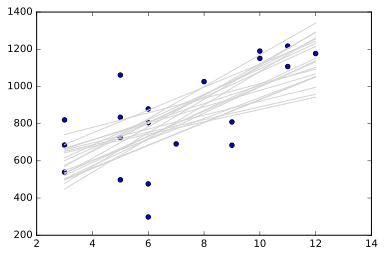

In [26]:
# Create scatter plot
plt.scatter(d.hours, d.milk)

# Adding a sample of the posterior draws to the plot in order to visualize the
# uncertainty of the regression line.
s = pd.DataFrame(stan_samples.extract())

for i in np.random.randint(len(s.index),size=20):
    plt.plot(d.hours, s.beta0[i] + d.hours*s.beta1[i], 'lightgray')

#abline(s[i,"beta0"], s[i,"beta1"], col = "gray")

It seems like there is good evidence that an increase in sunshine (or something that co-varies with sunshine perhaps…) results in an increase in milk production.